# CLUSTERING THE MILITARY POWERS OF COUNTRIES

With this project, we analyze the countries by grouping them according to military forces.

##### Import Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  

##### Read Data

In [2]:
df=pd.read_excel('World military power.xlsx')

#### EDA - Exploratory Data Analysis

In [3]:
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38,Albania,0,Albania,0,Albania,0,Albania,0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201,Algeria,0,Algeria,6,Algeria,0,Algeria,5,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57,Angola,0,Angola,0,Angola,0,Angola,0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,A

In [4]:
df.columns=df.loc[0]  
df.drop([0],axis=0,inplace=True)  

In [5]:
df.shape

(138, 60)

In [6]:
df = df.T.drop_duplicates().T.copy()

In [7]:
df.rename(columns={'Military Strength': 'Countries'}, inplace=True)

In [8]:
df.isnull().sum()

0
Countries                                   0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths                       14
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength            23
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value   

In [9]:
df['Total Border Coverage'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', nan, 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus',
       'Belgium', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Croatia', 'Cuba', 'Czechia',
       'Democratic Republic of the Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Honduras', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Liberia', 'Libya',
       'Lithuania', 'Malaysia', 'Mali', 'Mauritania', 'Mexico', 'Moldova',
       'Mongolia', 'Montenegro', 'Morocco', 'Mo

In [10]:
df.drop(['Navy Fleet Strengths','Aircraft Carrier Fleet Strength','Total Border Coverage','Total Coastline Coverage'],axis=1,inplace=True)

In [11]:
df.fillna(0, inplace=True)

In [12]:
df.isnull().sum()

0
Countries                                  0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Prod

In [13]:
df.describe()  

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,Airport Totals value,Total Border Coverage value
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,1.460716,388.471014,81.565217,25.760870,30.231884,82.833333,154.065217,25.623188,646.565217,2485.695652,212.159420,393.978261,156.934783,76.362319,0.318841,4.000000,1.710145,2.934783,290.043478,3705.688406
std,1.324018,1231.981859,230.324777,94.528222,92.330436,240.803721,520.183631,97.326091,1515.463683,5410.546392,688.028987,805.781703,484.380984,140.821984,1.804235,12.631787,9.154954,6.057157,1212.967393,3764.917170
min,0.060600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.574800,33.000000,0.000000,0.000000,3.000000,4.250000,15.250000,0.000000,19.250000,250.250000,0.000000,24.250000,0.000000,5.250000,0.000000,0.000000,0.000000,0.000000,33.500000,1401.250000
50%,1.034100,111.000000,17.000000,0.000000,9.000000,26.000000,44.000000,2.000000,153.000000,734.500000,23.000000,108.000000,24.000000,30.000000,0.000000,0.000000,0.000000,0.000000,68.000000,2564.500000
75%,2.021525,290.250000,60.500000,15.750000,26.000000,79.250000,126.750000,17.750000,436.250000,2000.000000,97.250000,296.500000,99.750000,72.750000,0.000000,2.000000,0.000000,4.000000,150.750000,5015.500000
max,10.168100,13264.000000,2085.000000,742.000000,945.000000,2643.000000,5768.000000,967.000000,12950.000000,39253.000000,6083.000000,4465.000000,3860.000000,984.000000,20.000000,83.000000,91.000000,52.000000,13513.000000,22457.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries                                138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [15]:
df.select_dtypes('object')  

,Countries,defense spending budget value,External Debt value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value
1,Afghanistan,"12,00,00,00,000","2,84,00,00,000",0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200
2,Albania,"25,00,00,000","9,50,50,00,000",16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41
3,Algeria,"13,00,00,00,000","6,26,00,00,000","13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0
4,Angola,"7,00,00,00,000","42,08,00,00,000","16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300
5,Argentina,"4,20,00,00,000","2,14,90,00,00,000","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000
...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,"74,50,00,000","1,00,30,00,00,000","20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800,7100
135,Vietnam,"5,50,00,00,000","96,58,00,00,000","2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444,17702
136,Yemen,"1,40,00,00,000","7,06,80,00,000",12260,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906,0
137,Zambia,"4,00,00,000","11,66,00,00,000",0,21000,0,"61,66,905","1,64,45,079","7,52,618",0,2250


In [16]:
for col in df.select_dtypes('object').columns[1:]:  
    df[col]=df[col].astype('str') 
    df[col]=df.select_dtypes('object')[col].str.replace(',','')
    df[col]=df[col].astype('float')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries                                138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [18]:
df.sample()

,Countries,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
18,Brazil,0.1988,715,43,78,126,198,242,12,437,1820,132,565,84,112,0,6,0,7,2.780000e+10,5.474000e+11,4093,2622000.0,3020000.0,1.300000e+10,107764996.0,208846892.0,8514877.0,7491.0,50000.0,16145


In [19]:
pd.set_option('display.max_rows', None) 
sorted_power_index = df['Military Strength Power Index'].sort_values() 
sorted_power_index

131     0.0606
102     0.0681
27      0.0691
50      0.0953
58      0.1501
111     0.1509
41      0.1702
130     0.1717
36      0.1872
18      0.1988
125     0.2098
56      0.2111
44      0.2186
52      0.2191
92      0.2364
51      0.2544
103     0.3034
55      0.3111
7       0.3225
113     0.3388
97      0.3397
135     0.3559
123     0.3571
23      0.3712
88      0.3718
120     0.4008
128     0.4457
3       0.4659
110     0.4985
118     0.5259
90      0.5277
117     0.5304
46      0.5311
31      0.5531
80      0.5691
83      0.5919
28      0.6045
74      0.6065
101     0.6177
95      0.6219
134     0.6449
87      0.6485
5       0.6521
71      0.6546
129     0.7034
11      0.7066
26      0.7668
96      0.7852
33      0.7878
53      0.7911
106     0.7966
133     0.8086
12      0.8179
49      0.8215
119     0.8241
4       0.8379
78      0.8408
107     0.8466
40      0.8498
39      0.8581
98      0.8612
19      0.8916
60      0.9098
9       0.9463
104     0.9479
8       0.9568
15      0.

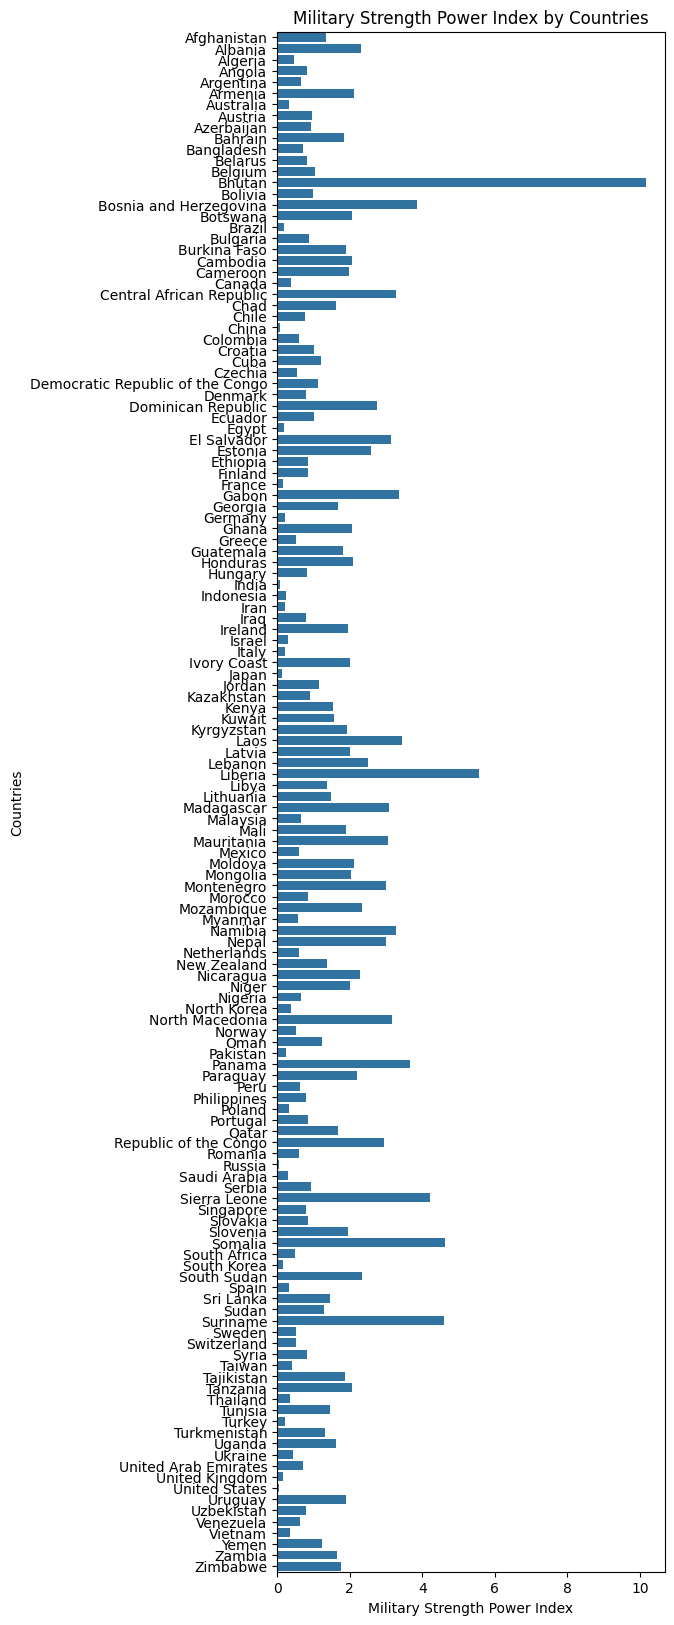

In [20]:
plt.figure(figsize=(5, 20))
sns.barplot(x='Military Strength Power Index',y='Countries',data=df)
plt.title('Military Strength Power Index by Countries');

### Clustering

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

In [22]:
x=df.drop(['Countries'],axis=1)

In [23]:
model=KMeans(4)  

In [24]:
model=model.fit(x)  

In [25]:
prediction=model.predict(x)

In [26]:
prediction

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0])

In [27]:
x['cluster']=prediction

In [28]:
silhouette_score(x,prediction)  

0.8713120561169533

In [29]:
x.sample(5)

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
122,2.0651,34,14,0,6,8,6,0,156,70,0,12,0,19,0,0,0,0,2.230000e+08,1.766000e+10,166,0.0,46000.0,0.000000e+00,10258498.0,55451343.0,947300.0,1424.0,0.0,4161,0
127,1.6176,48,10,0,2,10,26,5,371,1081,6,53,26,8,0,0,0,0,9.350000e+08,1.080000e+10,47,0.0,17500.0,2.500000e+09,14707350.0,40853749.0,241038.0,0.0,0.0,2729,0
102,0.0681,4163,873,742,424,497,1522,531,12950,27038,6083,4465,3860,603,1,62,16,10,4.800000e+10,5.396000e+11,1218,10580000.0,3225000.0,8.000000e+10,69640160.0,142122776.0,17098242.0,37653.0,102000.0,22408,0
129,0.7034,538,98,20,40,145,229,30,434,8691,183,76,72,75,0,0,0,0,2.275500e+10,2.376000e+11,43,3174000.0,575000.0,9.780000e+10,5820789.0,9701315.0,83600.0,1318.0,0.0,1066,0
91,1.2514,131,29,10,9,46,42,0,117,761,39,144,12,16,0,0,0,0,8.686000e+09,4.627000e+10,132,970400.0,100000.0,5.373000e+09,1764529.0,3494116.0,309500.0,2092.0,0.0,1561,0


In [30]:
wcss=[]   #Within-Cluster Sum of Squares
ss=[]     #Silhouette Score
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    prediction=model.predict(x)
    ssl=silhouette_score(x,prediction)
    ss.append(ssl)
    print(f"Number of clusters = {i}, Silhouette score: {ssl}")
    wcss.append(model.inertia_)

Number of clusters = 2, Silhouette score: 0.9227153206136329
Number of clusters = 3, Silhouette score: 0.8995442950361631
Number of clusters = 4, Silhouette score: 0.8713120561169533
Number of clusters = 5, Silhouette score: 0.8506559465915224
Number of clusters = 6, Silhouette score: 0.7789462745536555
Number of clusters = 7, Silhouette score: 0.7817947546427708
Number of clusters = 8, Silhouette score: 0.7766982061360016
Number of clusters = 9, Silhouette score: 0.7809562458841909


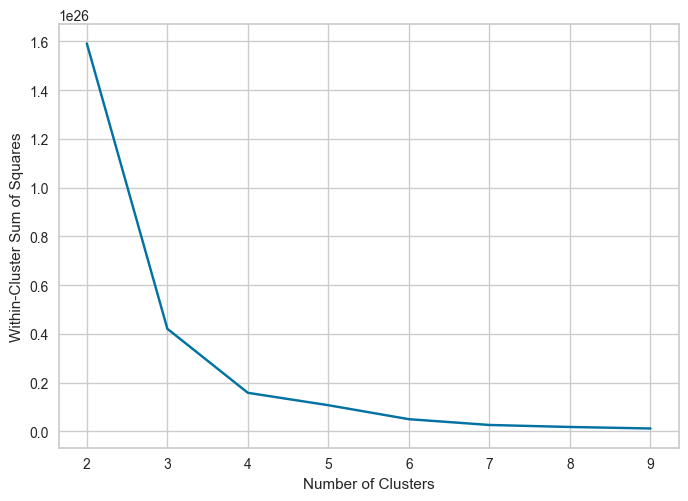

In [31]:
plt.plot(range(2,10),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares');  

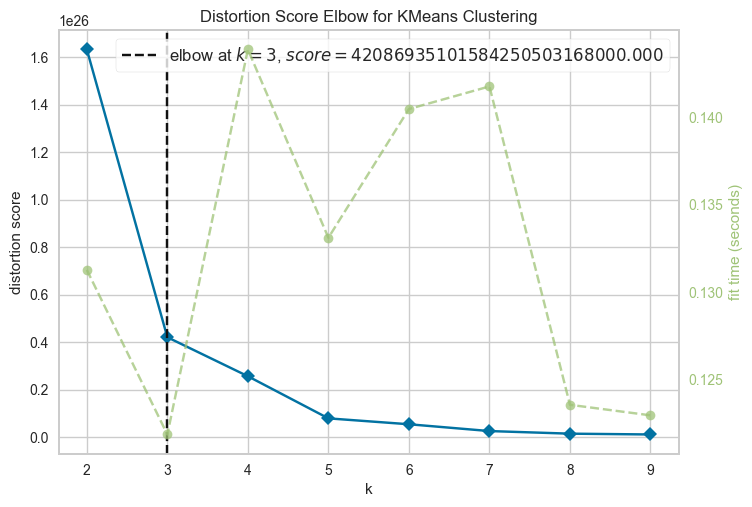

In [32]:
km=KMeans()
vis=KElbowVisualizer(km, k=(2,10))
vis.fit(x)
vis.show();

In [33]:
data=linkage(x,method='ward',metric='euclidean')

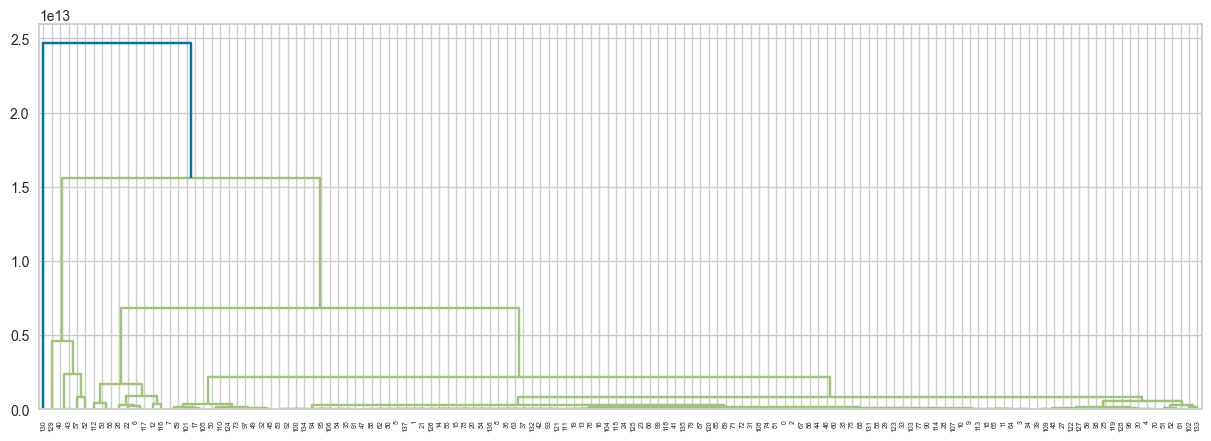

In [34]:
plt.figure(figsize=(15,5))
dendrogram(data);

In [35]:
x['Countries']=df['Countries']

In [36]:
x[x['cluster']==0]

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster,Countries
1,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,1.200000e+10,2.840000e+09,43,0.0,5500.0,0.000000e+00,14325743.0,3.494084e+07,652230.0,0.0,1200.0,5987,0,Afghanistan
2,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,2.500000e+08,9.505000e+09,4,16000.0,42500.0,1.683000e+08,1519438.0,3.057220e+06,28748.0,362.0,41.0,691,0,Albania
3,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,1.300000e+10,6.260000e+09,157,1306000.0,325000.0,1.220000e+10,20741263.0,4.165749e+07,2381741.0,998.0,0.0,6734,0,Algeria
4,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,7.000000e+09,4.208000e+10,176,1666000.0,82300.0,8.273000e+09,6244205.0,3.035588e+07,1246700.0,1600.0,1300.0,5369,0,Angola
5,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,4.200000e+09,2.149000e+11,1138,479400.0,685000.0,2.185000e+09,20179430.0,4.469420e+07,2780400.0,4989.0,11000.0,11968,0,Argentina
6,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0,0,0,0,0,1.385000e+09,1.041000e+10,11,0.0,47500.0,0.000000e+00,1696085.0,3.038217e+06,29743.0,0.0,0.0,1570,0,Armenia
8,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0,0,0,0,0,3.380000e+09,6.308000e+11,52,14260.0,215000.0,4.300000e+07,4017691.0,8.793370e+06,83871.0,0.0,0.0,2524,0,Austria
9,0.9463,147,17,12,1,29,88,17,570,1451,187,227,162,31,0,4,0,1,2.805000e+09,1.741000e+10,37,789300.0,180000.0,7.000000e+09,5042346.0,1.004652e+07,86600.0,713.0,0.0,2468,0,Azerbaijan
10,1.8547,109,17,0,2,37,65,22,180,843,33,26,17,39,0,0,0,1,1.415000e+09,5.215000e+10,4,45000.0,55000.0,1.246000e+08,806505.0,1.422659e+06,760.0,161.0,0.0,0,0,Bahrain
11,0.7066,177,44,0,11,57,67,0,276,1230,18,419,72,112,0,2,0,8,3.800000e+09,5.026000e+10,18,3666.0,112000.0,2.800000e+07,78913289.0,1.594530e+08,143998.0,580.0,8370.0,4413,0,Bangladesh


In [37]:
x[x['cluster']==2]

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster,Countries
41,0.1702,1229,269,0,121,187,589,62,528,6028,109,12,13,180,4,9,11,11,4.150000e+10,5.360000e+12,464,15170.0,1600000.0,7.235000e+07,30111868.0,67364357.0,643801.0,4853.0,8501.0,4072,2,France
44,0.2186,712,128,74,71,26,386,56,245,4583,108,0,38,80,0,6,0,9,5.000000e+10,5.326000e+12,539,43410.0,2500000.0,1.454000e+08,37010559.0,80457737.0,357022.0,2389.0,7467.0,3694,2,Germany
130,0.1717,733,133,15,44,241,312,49,227,5000,89,126,35,88,2,10,6,13,5.510000e+10,8.126000e+12,460,910500.0,1600000.0,2.564000e+09,29948413.0,65105246.0,243610.0,12429.0,3200.0,443,2,United Kingdom


In [38]:
x[x['cluster']==3]

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster,Countries
7,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48,2,6,2,8,2.630000e+10,1.714000e+12,480,263000.0,1005000.0,1.821000e+09,10808002.0,2.347014e+07,7741220.0,25760.0,2000.0,0,3,Australia
13,1.0499,148,43,0,12,64,29,0,0,984,0,0,0,17,0,0,0,2,4.921000e+09,1.281000e+12,41,0.0,645000.0,0.000000e+00,4833107.0,1.157076e+07,30528.0,67.0,2043.0,1297,3,Belgium
23,0.3712,385,62,0,38,135,145,0,80,1973,0,133,0,64,0,4,0,12,2.250000e+10,1.608000e+12,1467,3977000.0,2500000.0,1.697000e+11,16110865.0,3.588166e+07,9984670.0,202080.0,636.0,8893,3,Canada
27,0.0691,3210,1232,371,224,314,911,281,3500,33000,3800,3600,2650,777,2,74,36,52,2.370000e+11,1.598000e+12,507,3838000.0,13500000.0,2.562000e+10,752855402.0,1.384689e+09,9596961.0,14500.0,110000.0,22457,3,China
54,1.9481,19,0,0,0,8,8,0,0,124,0,0,0,8,0,0,0,0,8.700000e+08,2.470000e+12,40,0.0,145000.0,0.000000e+00,2366779.0,5.068050e+06,70273.0,1448.0,956.0,443,3,Ireland
56,0.2111,860,99,110,38,185,439,59,200,6947,54,108,21,249,2,8,4,12,2.780000e+10,2.444000e+12,129,77530.0,1300000.0,5.567000e+08,28011003.0,6.224667e+07,301340.0,7600.0,2400.0,1836,3,Italy
58,0.1501,1561,279,12,60,427,637,119,1004,3130,238,500,99,155,4,20,40,0,4.900000e+10,3.240000e+12,175,3841.0,4000000.0,4.412000e+07,53873803.0,1.261682e+08,377915.0,29751.0,1770.0,0,3,Japan
83,0.5919,168,61,1,4,27,75,28,18,1546,57,160,0,63,0,4,0,6,1.241900e+10,4.063000e+12,29,18170.0,840000.0,1.132000e+08,7820960.0,1.715123e+07,41543.0,451.0,6237.0,1053,3,Netherlands
113,0.3388,512,137,12,46,162,162,19,327,2023,95,140,0,77,1,3,0,11,1.510000e+10,2.094000e+12,150,2252.0,1226000.0,1.500000e+08,23136275.0,4.933108e+07,505370.0,4964.0,1000.0,1953,3,Spain
118,0.5259,169,54,0,18,54,42,0,326,1338,224,0,0,0,0,0,0,0,5.000000e+09,1.664000e+12,63,0.0,260000.0,0.000000e+00,3632250.0,8.292809e+06,41277.0,0.0,1299.0,1770,3,Switzerland


In [39]:
x[x['cluster']==1]

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster,Countries
131,0.0606,13264,2085,715,945,2643,5768,967,6289,39253,1465,2740,1366,490,20,66,91,0,7.500000e+11,1.791000e+13,13513,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,9826675.0,19924.0,41009.0,12048,1,United States


As can be seen in cluster=1, it is seen that America is a country with the highest military power by separating from other countries and forming a cluster on its own.